# **Download NOAA Data**
# We build a dataset to study the e- flux vs time for space weather forcasting
*This notebook is built on colab, change the colab related cell as needed*

**Import the necessary libraries**

In [2]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.5 MB/s eta 0:00:00


In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from netCDF4 import Dataset # the NOAA data are nc files
import numpy as np
import requests
import os
import cftime

**Mount the drive and define paths**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Download the data**

The NOAA data are stored at https://www.ngdc.noaa.gov/stp/satellite/goes-r.html
FOr this notebook, we download *GOES-R Level 1b data* from https://www.ngdc.noaa.gov/stp/satellite/goes-r.html
and we select SEISS (Space Environment In Situ Suite) data - SEISS MPS-HI L1b Magnetospheric Electrons and Protons: High Energy - 16

**Load the dataset**

Here we have 1 day (2022-11-24)

In [6]:
NOAA_dataset_path = '/content/drive/MyDrive/TinyML/Anomalies/GOES-highenergy/2022/ops_seis-l1b-mpsh_g16_d20221124_v0-0-0.nc'
# change the path accordingly

In [7]:
ds = Dataset(NOAA_dataset_path)


**Explore dataset**

In [8]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    production_site: RBU
    naming_authority: gov.nesdis.noaa
    institution: DOC/NOAA/NESDIS> U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    iso_series_metadata_id: f7087584-e5a8-11e3-ac10-0800200c9a66
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 8.5
    title: GOES-R Series Level 1b SEISS Magnetospheric Particle Sensor High Energy (MPS-HI) Product in Daily Aggregations
    summary: The GOES-R Magnetospheric Electrons and Protons: Medium and High Energy (MPSH) Product consists of fluxes of medium and high energy electrons and protons derived from in situ measurements of electron and proton count rates. The Magnetospheric Particle Sensor High (MPS-HI) makes these measuremen

In [9]:
ds.variables.keys()

dict_keys(['DiffElectronFluxes', 'IntgElectronFluxes', 'DiffProtonFluxes', 'DiffElectronUncertainties', 'IntgElectronUncertainties', 'DiffProtonUncertainties', 'DiffElectronFluxDQFs', 'DiffProtonFluxDQFs', 'IntgElectronFluxDQFs', 'Dos1_HiLetDose', 'Dos1_HiLetDqf', 'Dos2_HiLetDose', 'Dos2_HiLetDqf', 'Dos1_LoLetDose', 'Dos1_LoLetDqf', 'Dos2_LoLetDose', 'Dos2_LoLetDqf', 'L1a_EngData_Flag', 'L1a_ProtonData_Flag', 'L1a_EleData_Flag', 'L1a_DosData_Flag', 'L1b_Processing_Flag', 'N_blocks', 'Instrument_Mode', 'Instrument_Serial_Number', 'L1a_SciData_TimeStamp', 'quaternion_Q0', 'quaternion_Q1', 'quaternion_Q2', 'quaternion_Q3', 'ECEF_X', 'ECEF_Y', 'ECEF_Z', 'yaw_flip_flag', 'eclipse_flag', 'solar_array_current', 'product_time', 'direction_label', 'energy_electron_label', 'energy_proton_label', 'solar_array_current_channel_index_label', 'percent_uncorrectable_L0_errors'])

In [10]:
ds.variables["DiffElectronFluxes"][0]

masked_array(
  data=[[9.07874609e+03, 1.67786499e+03, 7.30767456e+02, 2.00939178e+02,
         8.39309921e+01, 1.66468163e+01, 1.74734557e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.09670527e+04, 1.64600049e+03, 7.20233337e+02, 3.66721619e+02,
         1.84800949e+02, 4.33175278e+01, 6.21615934e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.31952686e+04, 1.42980090e+03, 7.04917236e+02, 3.13558075e+02,
         8.23066635e+01, 7.37734365e+00, 1.84517252e+00, 0.00000000e+00,
         0.00000000e+00, 1.65918708e+00],
        [9.64757227e+03, 1.95923450e+03, 4.15845184e+02, 3.39238159e+02,
         1.24847481e+02, 1.41498251e+01, 4.39945412e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [4.28840381e+03, 1.14579285e+03, 4.52099884e+02, 1.20232605e+02,
         4.32970390e+01, 1.03057795e+01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00]],
  mask=False,
  fill_value=1e+20,
  dtype=flo

In [11]:
times = cftime.num2pydate(ds.variables["L1a_SciData_TimeStamp"][:], ds["L1a_SciData_TimeStamp"].units)

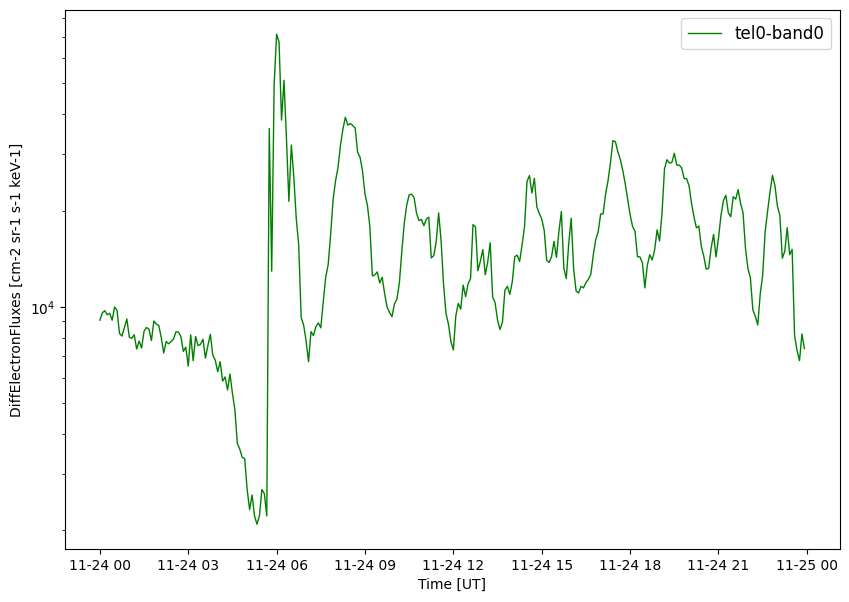

Done.



In [12]:
var = 'DiffElectronFluxes'
tel = 0
band = 0
data = []
for i in range(0, len(times), 300): # considering interval of 300 seconds
    data.append(ds.variables[var][i][tel][band])
plt.figure(0, figsize=[10, 7])
plt.plot(
    times[::300],
    data[:],
    linewidth=1,
    color="green",
    label=f"tel{tel}-band{band}",
)
plt.yscale("log")
plt.legend(loc="upper right", prop={"size": 12})
plt.xlabel("Time [UT]")
plt.ylabel(f"{var} [{ds[var].units}]")
plt.show()
print("Done.\n")

# Constructing the Dataset for 2021

we consider only the first 16days of each month

In [ ]:
dir0 = "/content/drive/MyDrive/TinyML/Anomalies/GOES-highenergy/2021/"
year= str(2021)
file_url = "https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l1b/seis-l1b-mpsh/"+year
file_name = "ops_seis-l1b-mpsh_g16_"
suffix = "_v0-0-0.nc"
# Download `file0` if it does not exist locally
for month in (["01", "02","03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]):
  for days in (["01", "02","03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16"]):

    print(month)
    file_name_to_save = f"{file_name}d{year}{month}{days}{suffix}"
    with open(dir0 + file_name_to_save, "wb") as f:
        url = f"{file_url}/{month}/{file_name_to_save}"
        print('downloading: ', url)
        r = requests.get(url)
        f.write(r.content)

01
downloading:  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l1b/seis-l1b-mpsh/2021/01/ops_seis-l1b-mpsh_g16_d20210101_v0-0-0.nc
01
downloading:  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l1b/seis-l1b-mpsh/2021/01/ops_seis-l1b-mpsh_g16_d20210102_v0-0-0.nc
01
downloading:  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l1b/seis-l1b-mpsh/2021/01/ops_seis-l1b-mpsh_g16_d20210103_v0-0-0.nc
01
downloading:  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l1b/seis-l1b-mpsh/2021/01/ops_seis-l1b-mpsh_g16_d20210104_v0-0-0.nc
01
downloading:  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l1b/seis-l1b-mpsh/2021/01/ops_seis-l1b-mpsh_g16_d20210105_v0-0-0.nc
01
downloading:  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l1b/seis-l1b-mpsh/2021/01/ops_seis-l1b-mpsh_g16_d20210106_v0-0-0.n